In [1]:
# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = 'home/ubuntu/Vision-Classifiers/Microsoft-Vision-Classifier/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/home/ubuntu/Vision-Classifiers/Microsoft-Vision-Classifier')

# This downloads the CIFAR-10 dataset to your Drive
# if it doesn't already exist.
%cd /$FOLDERNAME/flowers/
!bash get_datasets.sh
%cd /$FOLDERNAME

/home/ubuntu/Vision-Classifiers/Microsoft-Vision-Classifier/flowers
bash: get_datasets.sh: No such file or directory
/home/ubuntu/Vision-Classifiers/Microsoft-Vision-Classifier


In [2]:

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop


from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau

from tensorflow.keras.layers import Dropout, Flatten,Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
import os

path = '/home/ubuntu/Vision-Classifiers/Microsoft-Vision-Classifier'
os.listdir('/home/ubuntu/Vision-Classifiers/Microsoft-Vision-Classifier/flowers')



['rose', 'daisy', 'dandelion', 'flowers', 'sunflower', 'tulip']

In [4]:
X=[]
Z=[]
IMG_SIZE=150
FLOWER_DAISY_DIR=f'{path}/flowers/daisy'
FLOWER_SUNFLOWER_DIR=f'{path}/flowers/sunflower'
FLOWER_TULIP_DIR=f'{path}/flowers/tulip'
FLOWER_DANDI_DIR=f'{path}/flowers/dandelion'
FLOWER_ROSE_DIR=f'{path}/flowers/rose'
weights_path= f'{path}/trans-learn-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'


In [5]:
def assign_label(img,flower_type):
    return flower_type
    

In [6]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        
        

In [7]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
print(len(X))

100%|██████████| 769/769 [00:01<00:00, 473.58it/s]

769


In [8]:
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
print(len(X))

100%|██████████| 734/734 [00:01<00:00, 384.44it/s]

1503


In [9]:
make_train_data('Tulip',FLOWER_TULIP_DIR)
print(len(X))

100%|██████████| 984/984 [00:02<00:00, 439.14it/s]

2487


In [1]:
make_train_data('Dandelion',FLOWER_DANDI_DIR)
print(len(X))

NameError: name 'make_train_data' is not defined

In [11]:
make_train_data('Rose',FLOWER_ROSE_DIR)
print(len(X))

100%|██████████| 784/784 [00:01<00:00, 476.39it/s]

3405


In [13]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [16]:
np.random.seed(42)
rn.seed(42)
#tf.set_random_seed(42)
tf.random.set_seed(42)

In [17]:
base_model=VGG16(include_top=False, weights=None,input_shape=(150,150,3), pooling='avg')
 

In [18]:
base_model.load_weights(weights_path)

In [19]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [20]:
model=Sequential()



model.add(base_model)

model.add(Dense(256,activation='relu'))
model.add(Dense(5,activation='softmax'))



In [21]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False, 
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1,  
        width_shift_range=0.2,  
        height_shift_range=0.2,  
        horizontal_flip=True,  
        vertical_flip=False)  


datagen.fit(x_train)

In [22]:
epochs=50
batch_size=128
red_lr=ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=2, verbose=1)

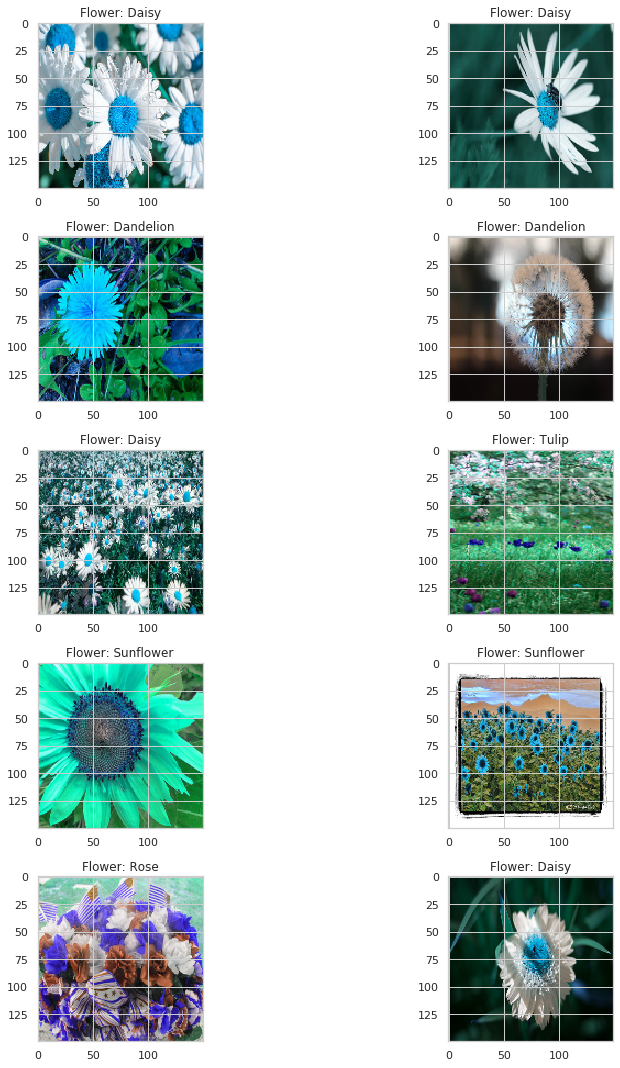

In [12]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()
        

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 14,847,301
Trainable params: 14,847,301
Non-trainable params: 0
_________________________________________________________________


In [24]:
base_model.trainable=False 

In [25]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])



In [27]:
gpus= tf.config.experimental.list_physical_devices('GPU')

History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
19/19 [==============================] - 63s 3s/step - loss: 1.5915 - accuracy: 0.2515 - val_loss: 1.5062 - val_accuracy: 0.2840
Epoch 2/50
19/19 [==============================] - 26s 1s/step - loss: 1.4343 - accuracy: 0.3835 - val_loss: 1.4005 - val_accuracy: 0.4249
Epoch 3/50
19/19 [==============================] - 16s 818ms/step - loss: 1.3572 - accuracy: 0.5002 - val_loss: 1.3233 - val_accuracy: 0.5587
Epoch 4/50
19/19 [==============================] - 16s 819ms/step - loss: 1.2868 - accuracy: 0.5505 - val_loss: 1.2572 - val_accuracy: 0.5915
Epoch 5/50
19/19 [==============================] - 16s 826ms/step - loss: 1.2216 - accuracy: 0.6234 - val_loss: 1.1954 - val_accuracy: 0.6150
Epoch 6/50
19/19 [==============================] - 16s 821ms/step - loss: 1.1696 - accuracy: 0.6235 - val_loss: 1.1449 - val_accuracy: 0.6432
Epoch 7/50
19/19 [==============================] - 16s 831ms/step - los

#### 3.5.2 ) FINE TUNING BY UNFREEZING THE LAST BLOCK OF VGG16

In this section I have done fine tuning. To see the effect of the fine tuning I have first unfreezed the last block of the VGG16 model and have set it to trainable.

In [28]:
for i in range (len(base_model.layers)):
    print (i,base_model.layers[i])
  
for layer in base_model.layers[15:]:
    layer.trainable=True
for layer in base_model.layers[0:15]:
    layer.trainable=False
  

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f915cd1bd90>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915ccff9d0>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915dd2e110>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f915cccb390>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1daa50>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1ddfd0>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f915d1de850>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1e2a90>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915cccb6d0>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1ea090>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f915d1efa90>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1f2b90>
12 <tensorflow.python.ke

In [29]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])



In [30]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
19/19 [==============================] - 16s 856ms/step - loss: 0.5600 - accuracy: 0.8049 - val_loss: 0.6109 - val_accuracy: 0.7805
Epoch 2/50
19/19 [==============================] - 16s 817ms/step - loss: 0.5682 - accuracy: 0.7946 - val_loss: 0.6119 - val_accuracy: 0.7805
Epoch 3/50
19/19 [==============================] - 15s 815ms/step - loss: 0.5552 - accuracy: 0.8099 - val_loss: 0.6062 - val_accuracy: 0.7864
Epoch 4/50
19/19 [==============================] - 16s 821ms/step - loss: 0.5591 - accuracy: 0.8029 - val_loss: 0.6047 - val_accuracy: 0.7887
Epoch 5/50
19/19 [==============================] - 16s 830ms/step - loss: 0.5459 - accuracy: 0.8078 - val_loss: 0.6008 - val_accuracy: 0.7899
Epoch 6/50
19/19 [==============================] - 16s 825ms/step - loss: 0.5545 - accuracy: 0.8029 - val_loss: 0.6033 - val_accuracy: 0.7852
Epoch 7/50
19/19 [==============================] - 16s 830ms/step - loss: 0.5503 - accuracy: 0.8025 - val_loss: 0.5967 - val_accuracy: 0.7911

In [34]:
for i in range (len(base_model.layers)):
    print (i,base_model.layers[i])
  
for layer in base_model.layers[11:]:
    layer.trainable=True
for layer in base_model.layers[0:11]:
    layer.trainable=False
  

0 <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f915cd1bd90>
1 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915ccff9d0>
2 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915dd2e110>
3 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f915cccb390>
4 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1daa50>
5 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1ddfd0>
6 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f915d1de850>
7 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1e2a90>
8 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915cccb6d0>
9 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1ea090>
10 <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f915d1efa90>
11 <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f915d1f2b90>
12 <tensorflow.python.ke

In [35]:
model.compile(optimizer=Adam(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])



In [36]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
19/19 [==============================] - 16s 849ms/step - loss: 0.4583 - accuracy: 0.8313 - val_loss: 0.5416 - val_accuracy: 0.8028
Epoch 2/50
19/19 [==============================] - 16s 829ms/step - loss: 0.4512 - accuracy: 0.8474 - val_loss: 0.5475 - val_accuracy: 0.7969
Epoch 3/50
19/19 [==============================] - 16s 827ms/step - loss: 0.4577 - accuracy: 0.8375 - val_loss: 0.5428 - val_accuracy: 0.8075
Epoch 4/50
19/19 [==============================] - 16s 822ms/step - loss: 0.4579 - accuracy: 0.8355 - val_loss: 0.5417 - val_accuracy: 0.8063
Epoch 5/50
19/19 [==============================] - 16s 823ms/step - loss: 0.4464 - accuracy: 0.8384 - val_loss: 0.5409 - val_accuracy: 0.7981
Epoch 6/50
19/19 [==============================] - 16s 822ms/step - loss: 0.4575 - accuracy: 0.8268 - val_loss: 0.5445 - val_accuracy: 0.8028
Epoch 7/50
19/19 [==============================] - 16s 821ms/step - loss: 0.4451 - accuracy: 0.8326 - val_loss: 0.5379 - val_accuracy: 0.8028

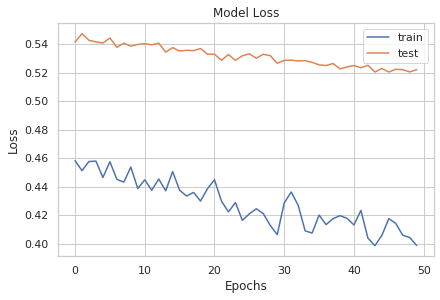

In [37]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

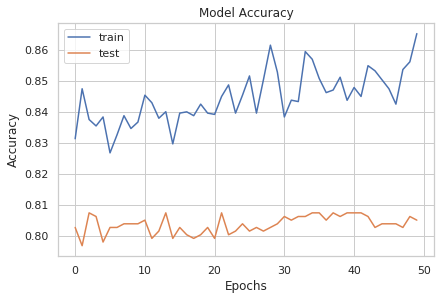

In [39]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [41]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
19/19 [==============================] - 16s 843ms/step - loss: 1.6723 - accuracy: 0.2866 - val_loss: 1.6014 - val_accuracy: 0.3122
Epoch 2/50
19/19 [==============================] - 16s 826ms/step - loss: 1.2888 - accuracy: 0.4738 - val_loss: 1.5040 - val_accuracy: 0.3415
Epoch 3/50
19/19 [==============================] - 15s 815ms/step - loss: 1.0890 - accuracy: 0.5682 - val_loss: 1.4173 - val_accuracy: 0.3709
Epoch 4/50
19/19 [==============================] - 16s 826ms/step - loss: 0.9660 - accuracy: 0.6433 - val_loss: 1.3438 - val_accuracy: 0.4002
Epoch 5/50
19/19 [==============================] - 16s 817ms/step - loss: 0.8855 - accuracy: 0.6784 - val_loss: 1.2693 - val_accuracy: 0.4589
Epoch 6/50
19/19 [==============================] - 16s 823ms/step - loss: 0.8247 - accuracy: 0.7014 - val_loss: 1.1978 - val_accuracy: 0.5505
Epoch 7/50
19/19 [==============================] - 16s 833ms/step - loss: 0.7744 - accuracy: 0.7266 - val_loss: 1.1243 - val_accuracy: 0.6127

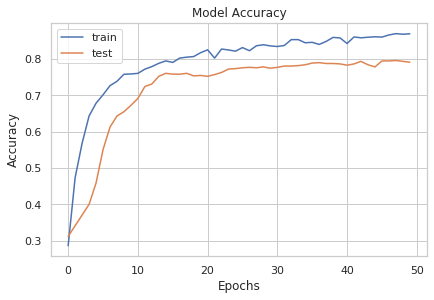

In [42]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()